In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

In [3]:
# Load the dataset
data = pd.read_csv('Reviews.csv')

In [4]:
# Filterize the text attribute
stop_words = set(stopwords.words('english'))
data['Filtered_Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [6]:
# Define a function to classify the sentiment
def get_sentiment(row):
    text = TextBlob(row['Filtered_Text'])
    score = row['Score']
    if text.sentiment.polarity > 0:
        if score > 3:
            return 'positive'
        elif score == 3:
            return 'neutral'
        else:
            return 'positive'
    elif text.sentiment.polarity == 0:
        return 'neutral'
    else:
        if score > 3:
            return 'positive'
        elif score == 3:
            return 'neutral'
        else:
            return 'negative'


In [7]:
# Apply the sentiment analysis to the reviews
data['Sentiment'] = data.apply(get_sentiment, axis=1)

# Count the total number of each category
positive_reviews = data[data['Sentiment'] == 'positive']
neutral_reviews = data[data['Sentiment'] == 'neutral']
negative_reviews=data[data['Sentiment'] == 'negative']

In [9]:
print('Total Positive Reviews:', len(positive_reviews))
print('Total Neutral Reviews:', len(neutral_reviews))
print('Total Negative Reviews:', len(negative_reviews))

Total Positive Reviews: 486406
Total Neutral Reviews: 52390
Total Negative Reviews: 29658


In [ ]:
 # Print the classified reviews
# for i, row in data.iterrows():
#     print('Review:', row['Filtered_Text'])
#     print('Sentiment:', row['Sentiment'])
#     print('-----')
#this will print review and sentiment...since it's very long commenting it.Not required

<module 'matplotlib.pyplot' from 'c:\\Users\\KIIT\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

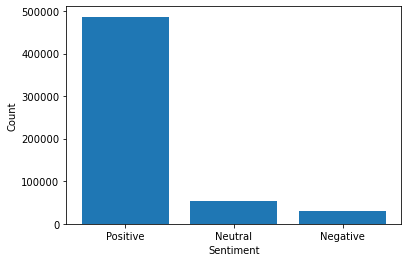

In [11]:
import matplotlib.pyplot as plt

# Define the counts of each sentiment
positive_count = 486406
neutral_count = 52390
negative_count = 29658

# Create a bar chart
sentiment_counts = [positive_count, neutral_count, negative_count]
sentiments = ['Positive', 'Neutral', 'Negative']
plt.bar(sentiments, sentiment_counts)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt


In [13]:
from textblob import TextBlob

# Add polarity and subjectivity columns to the data frame
data['Polarity'] = data['Filtered_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Filtered_Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [14]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Filtered_Text,Sentiment,Polarity,Subjectivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I bought several Vitality canned dog food prod...,positive,0.440000,0.420000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....,negative,-0.033333,0.762963
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"This confection around centuries. It light, pi...",positive,0.187000,0.548000
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If looking secret ingredient Robitussin I beli...,positive,0.150000,0.650000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great price. There wide assortment...,positive,0.458333,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Great sesame chicken..this good better restura...,positive,0.675000,0.662500
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,I'm disappointed flavor. The chocolate notes e...,negative,-0.208333,0.408333
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...","These stars small, give 10-15 one training ses...",positive,-0.021875,0.418750
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,These BEST treats training rewarding dog good ...,positive,0.517857,0.678571


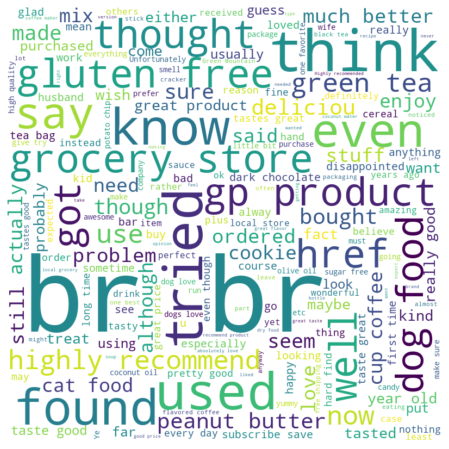

In [15]:
from wordcloud import WordCloud

# Create a text string by joining all the filtered reviews
text = ' '.join(review for review in data['Filtered_Text'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


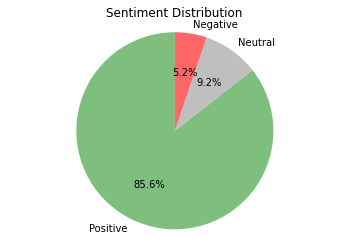

In [16]:
import matplotlib.pyplot as plt

# Define labels and sizes for the pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [486406, 52390, 29658]

# Define colors for the different sentiments
colors = ['#7ebf7e', '#bfbfbf', '#ff6666']

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title to the pie chart
ax1.set_title("Sentiment Distribution")

# Show the pie chart
plt.show()


for traning data extracting 20k sample for each category 

In [27]:
positive_data_train = data.loc[data['Sentiment'] == 'positive'][:20000]
negative_data_train = data.loc[data['Sentiment'] == 'negative'][:20000]
neutral_data_train = data.loc[data['Sentiment'] == 'neutral'][:20000]


for test data extracting next 8k sample for each category

In [28]:
test_pos = data[data['Sentiment'] == 'positive'].iloc[20000:28000]
test_neg = data[data['Sentiment'] == 'negative'].iloc[20000:28000]
test_neu = data[data['Sentiment'] == 'neutral'].iloc[20000:28000]


In [29]:
positive_data_train.shape
negative_data_train.shape
neutral_data_train.shape

(20000, 14)

In the context of combining the train data, the shape function is used to check the number of rows and columns in the train_pos, train_neg, and train_neu DataFrames, and then concatenate them along the rows.

The shape function in Python returns a tuple of integers representing the shape of a NumPy array or Pandas DataFrame. In the code for combining the train data, the shape function is used to check the number of rows and columns of each DataFrame to ensure that they have the same number of columns before concatenating them along the rows. By using the shape function, we can ensure that the data is properly aligned before combining them.

In [30]:
# combining the training samples and shuffling them
training_sample = pd.concat([positive_data_train, negative_data_train, neutral_data_train]).sample(frac=1).reset_index(drop=True)

# .concat() combines the datasets
# .sample(frac=1) shuffles the dataset
# .reset_index(drop=True) resets the index of the dataset

In [31]:
training_sample.shape

(60000, 14)

In [34]:
test_pos.shape
test_neg.shape
test_neu.shape

(8000, 14)

In [38]:
# combining the testing samples and shuffling them
testing_sample = pd.concat([test_pos, test_neg, test_neu]).sample(frac=1).reset_index(drop=True)

In [39]:
testing_sample.shape

(24000, 14)

In [42]:
training_sample

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Filtered_Text,Sentiment,Polarity,Subjectivity
0,38750,B000EGZ9AQ,A2PFMNK8C2R2DX,Ruth d.,1,4,3,1196640000,Jasmati white rice,The white Jasmati rice is not as aromatic or f...,The white Jasmati rice aromatic flavorful whit...,neutral,0.400000,0.350000
1,3895,B000A40OVQ,ALPKUPT5MDCJ1,Army Wife,11,11,5,1154908800,The only soy and dairy free shortening,This really is the only choice when it comes t...,This really choice comes soy dairy free baking...,positive,0.198452,0.488132
2,31888,B0062A87HA,A1GMMOLVHXH13T,crafty,0,0,5,1293580800,Good product,Just received two cases.<br /><br />There were...,Just received two cases.<br /><br />There 4 de...,neutral,0.000000,0.066667
3,132658,B002EM2JCY,AOVA66PZVGD9H,N. Risk,0,0,1,1321920000,Even one star is too many stars!!!!!,DO NOT BUY THIS PRODUCT FROM AMAZON!!!! The wa...,DO NOT BUY THIS PRODUCT FROM AMAZON!!!! The wa...,negative,-0.266667,0.583333
4,85692,B0053WMOJA,AZ7GJ72KEZTB9,Starling,11,14,2,1317254400,Too small for the price,I shopped around a little after purchasing thi...,I shopped around little purchasing antler chew...,negative,-0.009722,0.577778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,122897,B000VKA6ZS,A1RIL7SO29HD0,Keith Fishlock,3,4,3,1292716800,Not quite what I hoped for.,I have bought and enjoyed the other Primal pro...,"I bought enjoyed Primal products, I thought I ...",neutral,0.035784,0.547549
59996,37715,B004PXEZAE,A1CPAMBUND9X4V,Mark D Anderson,2,3,1,1312416000,Lame,"It's more expensive, you get less product and ...","It's expensive, get less product I can't open ...",negative,-0.168333,0.288333
59997,116268,B002YJ0118,A38YIYGG65TZZ1,chris,0,0,3,1350000000,not movie theater popcorn,This popcorn is not the same as movie theater ...,This popcorn movie theater popcorn. If ever ta...,neutral,0.035833,0.306667
59998,269273,B004GB6ZGC,A2GSAZR9FD7HUN,ingrid,2,2,1,1318636800,Not the same candy shown in the picture.,I thought I was buying the candies in the pict...,"I thought I buying candies picture, ones I ate...",negative,-0.183148,0.585185


In [43]:
# selecting the needed columns for training and testing samples
# review text , polarity, sentiment

# training sample
training_sample = training_sample[['Filtered_Text', 'Polarity', 'Sentiment']]

# testing sample
testing_sample = testing_sample[['Filtered_Text', 'Polarity', 'Sentiment']]

In [47]:
# Splitting the training sample into X_train and y_train
X_train = training_sample['Filtered_Text']
y_train = training_sample['Sentiment']

# Splitting the testing sample into X_test and y_test
X_test = testing_sample['Filtered_Text']
y_test = testing_sample['Sentiment']

importing required libraries for training and testing

In [48]:
# we will perform Naive Bayes, SVM, Random Forest and Logistic Regression on the dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Vectorizing data is the process of converting textual or categorical data into numerical vectors that can be used for machine learning models. Machine learning models cannot work with raw text or categorical data directly; instead, they require numerical inputs.

Vectorizing data is necessary for several reasons:

Most machine learning algorithms require numerical inputs.

Numerical vectors can capture the meaning and relationships between words or categories in a way that is useful for machine learning models.

Vectorization can help reduce the dimensionality of the data, making it easier to work with and reducing the risk of overfitting.

It can also help improve the performance of machine learning models by providing more informative input data.

# vectorizing


In [51]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# define preprocessing function
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # return preprocessed text
    return text

# instantiate CountVectorizer object
vectorizer = CountVectorizer(preprocessor=preprocess_text, stop_words='english')

# fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# transform the testing data
X_test = vectorizer.transform(X_test)


Linear regression is not suitable for classification tasks, as it is a regression algorithm that predicts continuous values rather than discrete categories. Therefore, we cannot use linear regression to build a classification model.

so we are using logistic regression, decision trees, random forests, SVM, etc. to build a classification model. 

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# create a logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)


c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7485833333333334
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.87      0.86      8000
     neutral       0.65      0.67      0.66      8000
    positive       0.74      0.71      0.72      8000

    accuracy                           0.75     24000
   macro avg       0.75      0.75      0.75     24000
weighted avg       0.75      0.75      0.75     24000

Confusion Matrix:
 [[6987  819  194]
 [ 912 5324 1764]
 [ 319 2026 5655]]


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# Create a SVM classifier
svm = SVC()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best hyperparameters to train the model
svm = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Print the accuracy, classification report, and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
